# 0. 데이터 가져오기 및 초기세팅

## 0.1 데이터 가져오기

한국 관광공사 Data Lab에서 제공하는 네비게이션 데이터를 가지고 분석해 보도록 하겠습니다.

**2022년 제주 지역 관광지 검색순위**

이 데이터는 티맵에서 제공하는 내비게이션 데이터로 티맵 어플리케이션 사용자가 목적지를 조회하고 100m & 1분 이상 이동한 행위에 대한 건수에 대한 데이터입니다.

<aside>
💡 자동차 이용 방문자의 데이터이며, 내비게이션을 이용하지 않거나 타 내비게이션을 이용한 경우, 대중교통, 도보 방문자는 이 데이터에 포함되지 않으므로 실제 방문자 수 추계가 불가능합니다.

</aside>

<aside>
💡 방문 목적을 확인할 수 없으며, 실제 목적지와 다를 수도 있습니다.

</aside>

## 0.2 초기 세팅

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글세팅

!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [34]:
plt.rc('font', family='NanumBarunGothic')

In [67]:
# 경고 무시

import warnings
warnings.filterwarnings("ignore")

In [36]:
관광지 = pd.read_excel('제주 관광지.xlsx')

관광지

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...,...,...
495,495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주특별자치도,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899


In [ ]:
# 데이터 제데로 들어왔는지 확인

관광지.info()

관광지.head()
관광지.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주특별자치도,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899
499,500,쇠와꽃승마장,제주특별자치도,서귀포시,제주 서귀포시 섭지코지로25번길 88-17,레저스포츠,육상레저스포츠,1895


In [ ]:
관광지.shape #500로우, 8컬럼

(500, 8)

In [ ]:
관광지.columns

Index(['순위', '관광지명', '광역시/도', '시/군/구', '도로명주소', '중분류 카테고리', '소분류 카테고리',
       '검색건수'],
      dtype='object')

In [ ]:
# 중분류 카테고리의 개수

관광지['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [ ]:
# 소분류 카테고리의 개수

관광지['소분류 카테고리'].unique()

array(['교통시설', '시장', '자연경관(하천/해양)', '자연경관(산)', '전시시설', '기타관광', '대형마트',
       '테마공원', '기타레저스포츠', '자연공원', '데이트코스', '면세점', '자연생태', '복합관광시설',
       '기타문화관광지', '웰니스관광', '도시공원', '자연관광(산)', '종교성지', '역사유적지', '농/산/어촌체험',
       '랜드마크관광', '육상레저스포츠', '공연시설', '레저스포츠시설', '수상레저스포츠', '쇼핑몰'],
      dtype=object)

In [ ]:
# 데이터 전처리

관광지.isnull().sum()

,0
순위,0
관광지명,0
광역시/도,0
시/군/구,0
도로명주소,0
중분류 카테고리,0
소분류 카테고리,0
검색건수,0


In [ ]:
#광역시/도 없애기

관광지 = 관광지.drop('광역시/도', axis=1)

KeyError: "['광역시/도'] not found in axis"

In [ ]:
관광지

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...,...
495,495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899


In [ ]:
#시군구 없애기

관광지 = 관광지.drop('시/군/구', axis=1)

관광지

,순위,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,495,퍼시픽마리나,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899


In [ ]:
관광지['중분류 카테고리'].value_counts()

,count
중분류 카테고리,
자연관광,138
문화관광,137
기타관광,94
레저스포츠,79
쇼핑,31
역사관광,14
체험관광,7


<Axes: xlabel='중분류 카테고리'>

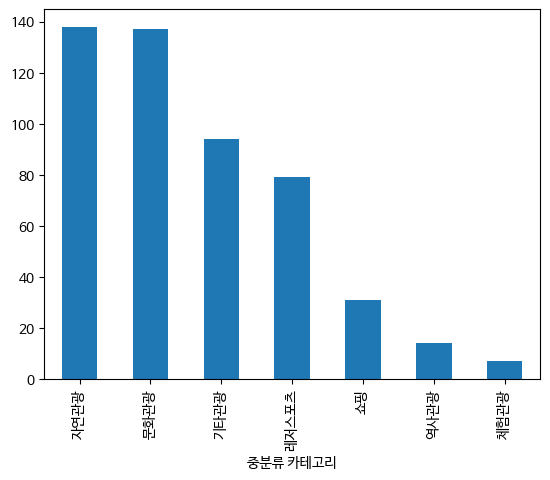

In [ ]:
# 중분류 카테고리를 간단하게 그래프로 확인하기

관광지['중분류 카테고리'].value_counts().plot(kind='bar')

<Axes: ylabel='중분류 카테고리'>

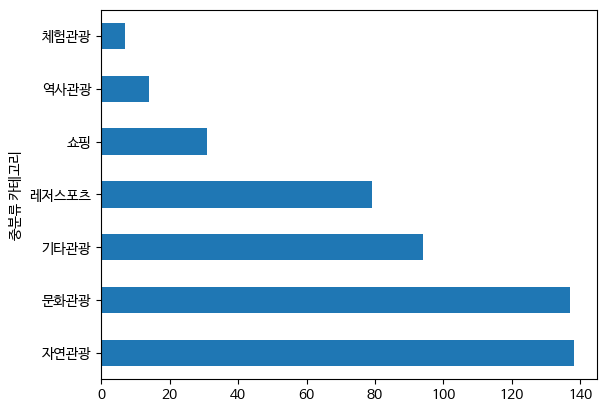

In [ ]:
관광지['중분류 카테고리'].value_counts().plot(kind='barh') #barh : bar 그래프 눕히기

<Axes: ylabel='소분류 카테고리'>

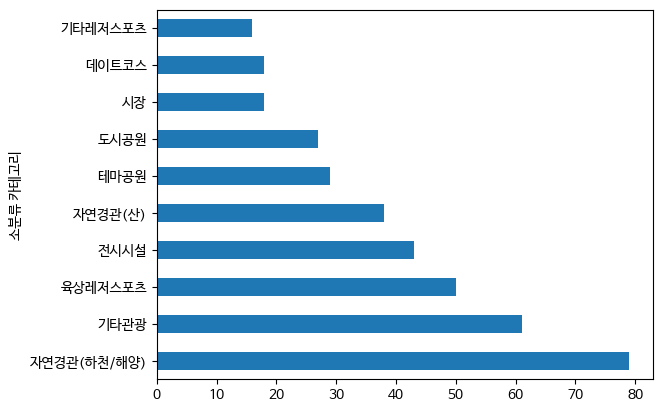

In [38]:
#소분류 카테고리 상위 10개만 확인하기

관광지['소분류 카테고리'].value_counts()[:10].plot(kind='barh')

<Axes: ylabel='소분류 카테고리'>

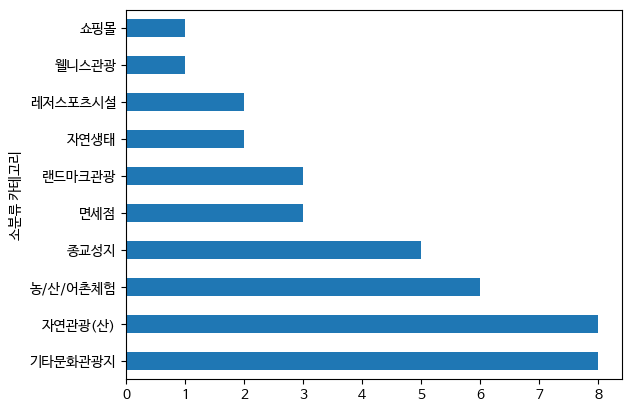

In [40]:
#소분류 카테고리 하위 10개만 확인하기

관광지['소분류 카테고리'].value_counts()[-10:].plot(kind='barh')

## 1.5 여름에 제주도에서 어느 바다를 많이 찾을까?

In [41]:
관광지

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...,...,...
495,495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주특별자치도,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899


In [43]:
관광지['소분류 카테고리'].unique()

array(['교통시설', '시장', '자연경관(하천/해양)', '자연경관(산)', '전시시설', '기타관광', '대형마트',
       '테마공원', '기타레저스포츠', '자연공원', '데이트코스', '면세점', '자연생태', '복합관광시설',
       '기타문화관광지', '웰니스관광', '도시공원', '자연관광(산)', '종교성지', '역사유적지', '농/산/어촌체험',
       '랜드마크관광', '육상레저스포츠', '공연시설', '레저스포츠시설', '수상레저스포츠', '쇼핑몰'],
      dtype=object)

In [48]:
#관광지중 '자연경관(하천/해양)' 인 관광지 추출

제주_바다 = 관광지[관광지['소분류 카테고리'] == '자연경관(하천/해양)']

제주_바다

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...,...,...
454,455,하효항,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
473,474,구두미포구,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
482,483,제주항,제주특별자치도,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997
484,485,김녕포구,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),1974


In [49]:
제주_바다['검색건수'].sum()

1742995

In [50]:
# 각 바다의 검색비중이 얼마나 되는지 컬럼 추가

제주_바다['검색비중'] = (제주_바다['검색건수']/제주_바다['검색건수'].sum()) * 100

In [51]:
제주_바다

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,검색비중
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,11.215006
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,10.685745
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,7.743568
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,6.408624
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,4.503054
...,...,...,...,...,...,...,...,...,...
454,455,하효항,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292,0.131498
473,474,구두미포구,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068,0.118646
482,483,제주항,제주특별자치도,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997,0.114573
484,485,김녕포구,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),1974,0.113253


In [52]:
#제주_바다 의 데이터중 검색비중의 상위10개 데이터 출력

제주_바다['검색비중'][:10]

,검색비중
3,11.215006
5,10.685745
6,7.743568
9,6.408624
21,4.503054
22,4.452623
28,3.550727
31,3.352333
32,3.262545
38,2.873789


In [54]:
#제주_바다 의 데이터중 검색비중이 1% 이상인 데이터 출력

제주_바다[제주_바다['검색비중'] > 1]

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,검색비중
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,11.215006
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,10.685745
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,7.743568
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,6.408624
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,4.503054
22,23,금능해수욕장,제주특별자치도,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,4.452623
28,29,중문색달해변,제주특별자치도,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,3.550727
31,32,월정리해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,3.352333
32,33,표선해수욕장,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,3.262545
38,39,성산항,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),50090,2.873789


In [60]:
#제주_바다 의 데이터중 검색비중이 1% 이상인 데이터 출력
#관광지명, 검색비중 만 출력

제주_바다[제주_바다['검색비중'] > 1][['관광지명', '검색비중']] # 관광지명과 검색비중 둘다 보려면 DF이므로 대괄호 하나 더 넣어야함.

,관광지명,검색비중
3,함덕해수욕장,11.215006
5,협재해수욕장,10.685745
6,이호테우해변,7.743568
9,곽지해수욕장,6.408624
21,김녕해수욕장,4.503054
22,금능해수욕장,4.452623
28,중문색달해변,3.550727
31,월정리해변,3.352333
32,표선해수욕장,3.262545
38,성산항,2.873789


In [62]:
제주_바다

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,검색비중
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,11.215006
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,10.685745
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,7.743568
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,6.408624
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,4.503054
...,...,...,...,...,...,...,...,...,...
454,455,하효항,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292,0.131498
473,474,구두미포구,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068,0.118646
482,483,제주항,제주특별자치도,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997,0.114573
484,485,김녕포구,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),1974,0.113253


In [63]:
# 관광지명에서 항,부두,염전,저수지(해수욕 못하는곳들) 을 제거

제주_바다 = 제주_바다.drop(labels=제주_바다[제주_바다['관광지명'].str[-1]=='항'].index,axis=0) #맨 마지막에 항이라는 텍스트가 있는 데이터를 제거
제주_바다 = 제주_바다.drop(labels=제주_바다[제주_바다['관광지명'].str[-2:]=='부두'].index,axis=0)
제주_바다 = 제주_바다.drop(labels=제주_바다[제주_바다['관광지명'].str[-2:]=='염전'].index,axis=0)
제주_바다 = 제주_바다.drop(labels=제주_바다[제주_바다['관광지명'].str[-3:]=='저수지'].index,axis=0)

제주_바다

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,검색비중
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,11.215006
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,10.685745
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,7.743568
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,6.408624
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,4.503054
22,23,금능해수욕장,제주특별자치도,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,4.452623
28,29,중문색달해변,제주특별자치도,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,3.550727
31,32,월정리해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,3.352333
32,33,표선해수욕장,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,3.262545
39,40,광치기해변,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,2.829612


In [64]:
제주_바다.describe()

,순위,검색건수,검색비중
count,56.000000,56.000000,56.000000
mean,232.357143,25545.696429,1.465621
std,150.796121,42682.088716,2.448779
min,4.000000,1943.000000,0.111475
25%,96.500000,3783.500000,0.217069
50%,238.000000,7333.500000,0.420741
75%,359.750000,19945.500000,1.144323
max,489.000000,195477.000000,11.215006


{'whiskers': [<matplotlib.lines.Line2D at 0x79e568ae7ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x79e568af4f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e568ae71d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79e568af6210>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e568af6b10>],
 'means': []}

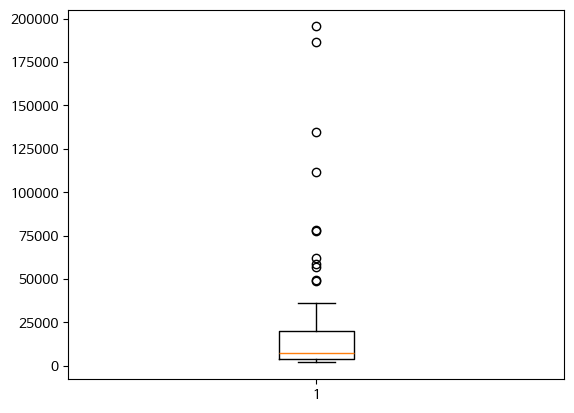

In [68]:
plt.boxplot(제주_바다['검색건수'])

In [69]:
19945.500000 * 1.5

29918.25

In [70]:
# 제주 바다의 혼잡도 컬럼 추가

제주_바다['혼잡도'] = np.where(제주_바다['검색건수'] > 29918, '혼잡', '보통')

제주_바다

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,검색비중,혼잡도
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,11.215006,혼잡
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,10.685745,혼잡
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,7.743568,혼잡
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,6.408624,혼잡
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,4.503054,혼잡
22,23,금능해수욕장,제주특별자치도,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,4.452623,혼잡
28,29,중문색달해변,제주특별자치도,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,3.550727,혼잡
31,32,월정리해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,3.352333,혼잡
32,33,표선해수욕장,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,3.262545,혼잡
39,40,광치기해변,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,2.829612,혼잡


# 2. 제주 음식점

## 2.1 데이터 불러오기

In [72]:
음식점 = pd.read_excel('제주 음식점.xlsx')
음식점

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...,...
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [73]:
음식점.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [74]:
음식점.shape

(500, 8)

In [77]:
음식점['소분류 카테고리'].unique()
# 음식점['중분류 카테고리'].unique()

array(['한식', '간이음식', '카페/찻집', '음식점기타', '전문음식', '외국식'], dtype=object)

In [78]:
# 데이터 전처리

음식점.isnull().sum()

,0
순위,0
관광지명,0
광역시/도,0
시/군/구,0
도로명주소,0
중분류 카테고리,0
소분류 카테고리,0
검색건수,0


In [79]:
음식점.columns

Index(['순위', '관광지명', '광역시/도', '시/군/구', '도로명주소', '중분류 카테고리', '소분류 카테고리',
       '검색건수'],
      dtype='object')

In [80]:
# 필요없는 컬럼 삭제

음식점 = 음식점.drop(['광역시/도', '중분류 카테고리'], axis=1)

음식점

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [81]:
# 제주도에서 가장 많이 가는 국수가게 출력
# 관광지명중에 국수가 들어간 리스트 출력

음식점[음식점['관광지명'].str.contains('국수')]


,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
17,18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
28,29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
33,34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
67,68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
81,82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
82,83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
99,100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
111,112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711
136,137,고씨네천지국수,서귀포시,제주 서귀포시 중앙로79번길 4-0,한식,8722


In [86]:
# 제주도에서 사람들이 많이 가는 카페 리스트 top10을 뽑으시오.(스타벅스 제외)

음식점

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [88]:
음식점['소분류 카테고리'].unique()

array(['한식', '간이음식', '카페/찻집', '음식점기타', '전문음식', '외국식'], dtype=object)

In [93]:
음식점[음식점['소분류 카테고리'] == '카페/찻집'][:10]

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
5,6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
8,9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
12,13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
13,14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
14,15,델문도,제주시,제주 제주시 조함해안로 519-10,카페/찻집,30286
15,16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
18,19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
19,20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813


In [96]:
카페 = 음식점[음식점['소분류 카테고리'] == '카페/찻집']

카페

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
5,6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
8,9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
12,13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...,...
467,468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
482,483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611
490,491,카페록록,제주시,제주 제주시 하도서문길 41-0,카페/찻집,3574


In [98]:
스벅제외카페 = 카페[~카페['관광지명'].str.contains('스타벅스')]
스벅제외카페

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
5,6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
8,9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
14,15,델문도,제주시,제주 제주시 조함해안로 519-10,카페/찻집,30286
...,...,...,...,...,...,...
467,468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
482,483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611
490,491,카페록록,제주시,제주 제주시 하도서문길 41-0,카페/찻집,3574


In [100]:
# 스타벅스를 제외한 상위 10개 카페 출력

스벅제외카페[:10]

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
5,6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
8,9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
14,15,델문도,제주시,제주 제주시 조함해안로 519-10,카페/찻집,30286
22,23,목장카페드르쿰다,서귀포시,제주 서귀포시 번영로 2454-0,카페/찻집,25505
24,25,미쁜제과,서귀포시,제주 서귀포시 도원남로 16-0,카페/찻집,24740
27,28,UMU,제주시,제주 제주시 한림로 542-1,카페/찻집,23166
30,31,드르쿰다in성산,서귀포시,제주 서귀포시 섭지코지로25번길 64-0,카페/찻집,21909
36,37,마노르블랑,서귀포시,제주 서귀포시 일주서로2100번길 46-0,카페/찻집,20691


In [102]:
스타벅스 = 카페[카페['관광지명'].str.contains('스타벅스')]

스타벅스

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
12,13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
13,14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
15,16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
18,19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
19,20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
34,35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
39,40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
50,51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
71,72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737
74,75,스타벅스제주외도DT점,제주시,제주 제주시 일주서로 7300-0,카페/찻집,13026
